In [290]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import acquire

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

### Decision Trees
What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?

In [2]:
from acquire import get_titanic_data

In [3]:
df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
def clean_titanic_data(df):
    '''
    Takes in a titanic dataframe and returns a cleaned dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: clean_df - a dataframe with the cleaning operations performed on it
    '''
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['embarked', 'class', 'passenger_id', 'deck', 'Unnamed: 0']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])  

In [5]:
df = clean_titanic_data(df)
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [6]:
def impute_age(train, validate, test):
    '''
    Imputes the mean age of train to all three datasets
    '''
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    imputer = imputer.fit(train[['age']])
    train[['age']] = imputer.transform(train[['age']])
    validate[['age']] = imputer.transform(validate[['age']])
    test[['age']] = imputer.transform(test[['age']])
    return train, validate, test

In [9]:
def prep_titanic_data(df): 
    train, test = train_test_split(df,
                               train_size = 0.8,
                               stratify = df.survived,
                               random_state=1234)
    train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state=1234)
    train, validate, test = impute_age(train, validate, test)
    return train, validate, test

In [12]:
train, validate, test = prep_titanic_data(df)


In [18]:
train.shape, validate.shape, test.shape

((436, 10), (188, 10), (156, 10))

In [19]:
# determine baseline model
train.survived.value_counts() 

0    256
1    180
Name: survived, dtype: int64

In [75]:
baseline_prediction = (y_train == 0)

baseline_accuracy = baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.59


In [23]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [40]:

clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [41]:
clf = clf.fit(X_train, y_train)

[Text(362.7, 332.955, 'sex_male <= 0.5\ngini = 0.485\nsamples = 436\nvalue = [256, 180]\nclass = 0'),
 Text(181.35, 237.825, 'pclass <= 2.5\ngini = 0.407\nsamples = 162\nvalue = [46, 116]\nclass = 1'),
 Text(90.675, 142.695, 'age <= 3.0\ngini = 0.108\nsamples = 87\nvalue = [5, 82]\nclass = 1'),
 Text(45.3375, 47.565, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.089\nsamples = 86\nvalue = [4, 82]\nclass = 1'),
 Text(272.025, 142.695, 'age <= 38.5\ngini = 0.496\nsamples = 75\nvalue = [41, 34]\nclass = 0'),
 Text(226.6875, 47.565, 'gini = 0.5\nsamples = 66\nvalue = [32, 34]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(544.05, 237.825, 'age <= 5.5\ngini = 0.358\nsamples = 274\nvalue = [210, 64]\nclass = 0'),
 Text(453.375, 142.695, 'sibsp <= 3.0\ngini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = 1'),
 Text(408.03749999999997, 47.565, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1'),
 T

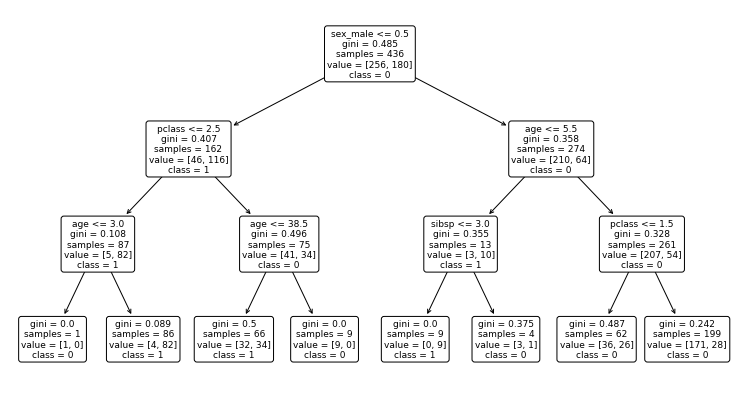

In [42]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)


In [43]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:15]


array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [44]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:15]

array([[0.85929648, 0.14070352],
       [0.85929648, 0.14070352],
       [0.48484848, 0.51515152],
       [0.85929648, 0.14070352],
       [0.04651163, 0.95348837],
       [0.48484848, 0.51515152],
       [0.58064516, 0.41935484],
       [0.48484848, 0.51515152],
       [0.58064516, 0.41935484],
       [0.58064516, 0.41935484],
       [0.85929648, 0.14070352],
       [0.        , 1.        ],
       [0.04651163, 0.95348837],
       [0.85929648, 0.14070352],
       [0.85929648, 0.14070352]])

In [64]:
print('Accuracy on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy on training set: 0.78


In [46]:
confusion_matrix(y_train, y_pred)


array([[220,  36],
       [ 55, 125]])

In [47]:
y_train.value_counts()


0    256
1    180
Name: survived, dtype: int64

In [48]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,0,1
0,220,36
1,55,125


In [49]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       256
           1       0.78      0.69      0.73       180

    accuracy                           0.79       436
   macro avg       0.79      0.78      0.78       436
weighted avg       0.79      0.79      0.79       436



In [65]:
print('Accuracy of validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of validate set: 0.78


In [51]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       110
           1       0.73      0.73      0.73        78

    accuracy                           0.78       188
   macro avg       0.77      0.77      0.77       188
weighted avg       0.78      0.78      0.78       188



Accuracy of training set: 0.78
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       256
           1       0.92      0.51      0.66       180

    accuracy                           0.78       436
   macro avg       0.83      0.74      0.75       436
weighted avg       0.81      0.78      0.76       436

Accuracy of validate set: 0.78
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       110
           1       0.86      0.56      0.68        78

    accuracy                           0.78       188
   macro avg       0.81      0.75      0.76       188
weighted avg       0.80      0.78      0.77       188



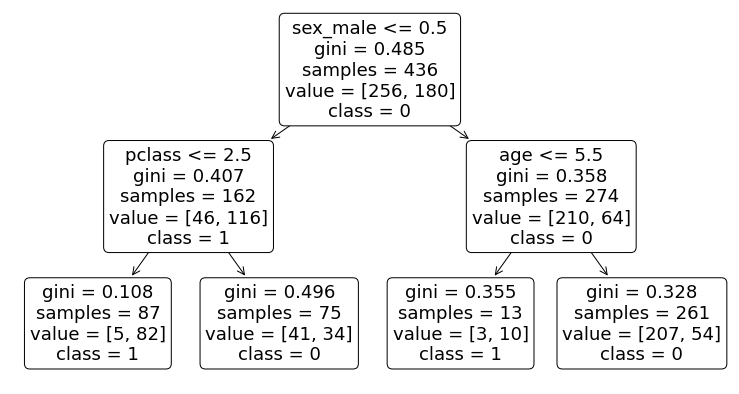

In [67]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=2, random_state=123)


clf = clf.fit(X_train, y_train)

plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)


# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:15]


y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:15]

print('Accuracy of training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


# confusion matrix

confusion_matrix(y_train, y_pred)


y_train.value_counts()


import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


print(classification_report(y_train, y_pred))


print('Accuracy of validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


Accuracy of training set: 0.87
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       256
           1       0.90      0.77      0.83       180

    accuracy                           0.87       436
   macro avg       0.88      0.86      0.86       436
weighted avg       0.87      0.87      0.87       436

Accuracy of validate set: 0.79
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.75      0.73      0.74        78

    accuracy                           0.79       188
   macro avg       0.78      0.78      0.78       188
weighted avg       0.79      0.79      0.79       188



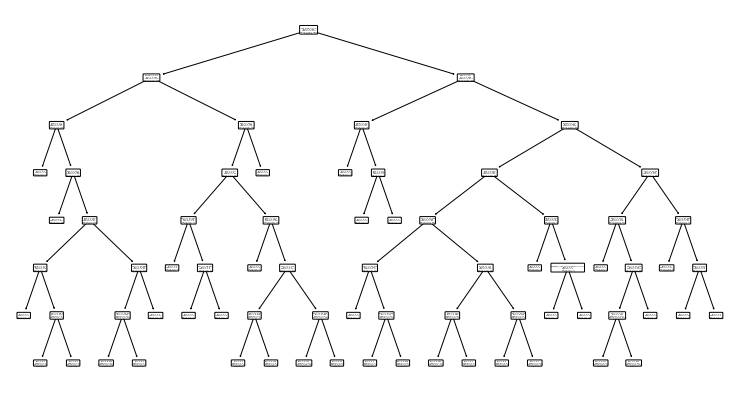

In [66]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=7, random_state=123)


clf = clf.fit(X_train, y_train)

plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)


# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:15]


y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:15]

print('Accuracy of training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


# confusion matrix

confusion_matrix(y_train, y_pred)


y_train.value_counts()


import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


print(classification_report(y_train, y_pred))


print('Accuracy of validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


### KNN
Continue working in your model file with the titanic dataset.

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 setting k to 10

Run through setps 2-4 setting k to 20

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Which model performs best on our out-of-sample data from validate?

In [76]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [83]:
def train_validate_test_split(df, target, seed=123):
   
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df['survived'])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate['survived'])
    return train, validate, test

In [84]:
train.shape, test.shape, validate.shape

((436, 10), (156, 10), (188, 10))

In [120]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
206,0,3,32.0,1,0,15.8500,0,1,0,1
626,0,2,57.0,0,0,12.3500,1,1,1,0
702,0,3,18.0,0,1,14.4542,0,0,0,0
253,0,3,30.0,1,0,16.1000,0,1,0,1
218,1,1,32.0,0,0,76.2917,1,0,0,0


In [180]:
# x_cols = ['pclass', 'age', 'alone', 'fare']
# y_col = 'survived'

# X_train, y_train = train[x_cols], train[y_col]
# X_validate, y_validate = validate[x_cols], validate[y_col]
# X_test, y_test = test[x_cols], test[y_col]

In [189]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived



In [193]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [194]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [195]:
y_pred = knn.predict(X_train)
y_pred[0:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [196]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ]])

In [197]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.77


In [198]:
pd.DataFrame(confusion_matrix(y_train, y_pred))


,0,1
0,217,39
1,61,119


In [199]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))


Accuracy of KNN classifier on validate set: 0.68


In [200]:
TP = 217
FP = 61
FN = 39
TN = 119
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7706422018348624
True Positive Rate: 0.84765625
False Positive Rate: 0.3388888888888889
True Negative Rate: 0.6611111111111111
False Negative Rate: 0.15234375
Precision: 0.7805755395683454
Recall: 0.84765625
F1 Score: 0.8127340823970038
Support (0): 256
Support (1): 180


In [147]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred[0:10]


array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [148]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.7, 0.3],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.8, 0.2]])

In [149]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [150]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.70


In [151]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,217,39
1,85,95


In [152]:
TP = 217
FP = 85
FN = 39
TN = 95
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")



Accuracy: 0.7155963302752294
True Positive Rate: 0.84765625
False Positive Rate: 0.4722222222222222
True Negative Rate: 0.5277777777777778
False Negative Rate: 0.15234375
Precision: 0.7185430463576159
Recall: 0.84765625
F1 Score: 0.7777777777777777
Support (0): 256
Support (1): 180


In [153]:
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [154]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.6 , 0.4 ],
       [0.85, 0.15],
       [0.6 , 0.4 ],
       [0.7 , 0.3 ],
       [0.35, 0.65],
       [0.4 , 0.6 ],
       [0.5 , 0.5 ],
       [0.65, 0.35],
       [0.5 , 0.5 ],
       [0.7 , 0.3 ]])

In [155]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.69


In [156]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.67


In [157]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,220,36
1,98,82


In [158]:
TP = 220
FP = 98
FN = 36
TN = 82
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.6926605504587156
True Positive Rate: 0.859375
False Positive Rate: 0.5444444444444444
True Negative Rate: 0.45555555555555555
False Negative Rate: 0.140625
Precision: 0.6918238993710691
Recall: 0.859375
F1 Score: 0.7665505226480837
Support (0): 256
Support (1): 180


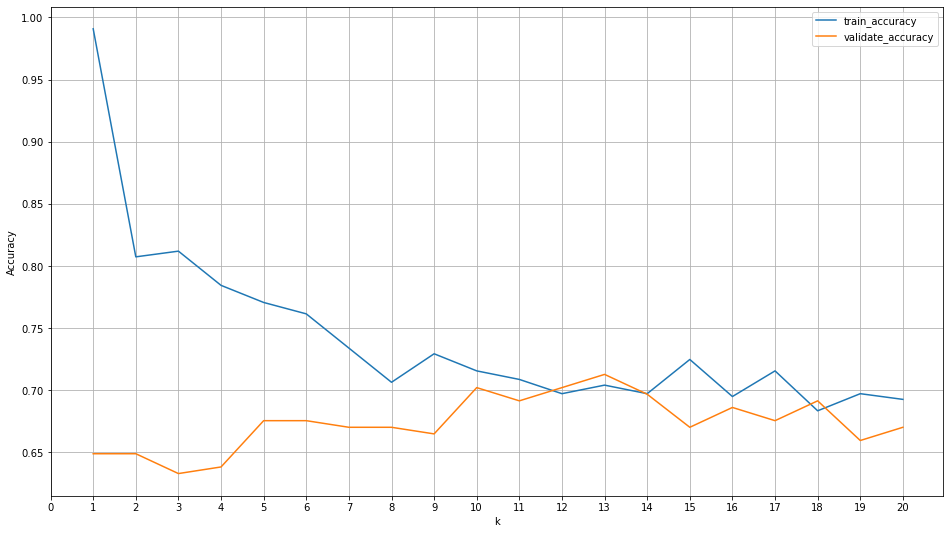

In [201]:
####From review:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### Logistic Regression 
Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

Try out other combinations of features and models.

Use you best 3 models to predict and evaluate on your validate sample.

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?



In [202]:
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_prediction
0,0,3,22.0,1,0,7.2500,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,0,1,0


In [219]:
df.isna().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
baseline_prediction        0
dtype: int64

In [218]:
mean_age = df.age.mean()
df.age = df.age.fillna(mean_age)

In [220]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
   
    
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df['survived'])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate['survived'])
    return train, validate, test

In [221]:
train.shape, validate.shape, test.shape

((436, 11), (188, 11), (156, 11))

In [224]:
train, validate, test = train_validate_test_split(df, target='survived', seed=123)
features = ['age', 'fare',  'pclass', 'sex_male']
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[features]
y_train = train.survived

X_validate = validate[features]
y_validate = validate.survived

X_test = test[features]
y_test = test.survived

In [222]:
#determine baseline
train.survived.value_counts()

0    256
1    180
Name: survived, dtype: int64

In [223]:
baseline = (train.survived == 0).mean()
round(baseline,2)

0.59

In [225]:
from sklearn.linear_model import LogisticRegression

In [245]:
logit = LogisticRegression(random_state=123)

In [246]:
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [247]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)


Coefficient: 
 [[-2.63616332e-02 -2.00616540e-03 -1.15198558e+00 -2.13310996e+00]]
Intercept: 
 [4.2780044]


In [248]:
y_pred = logit.predict(X_train)
y_pred[0:15]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [249]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[0:15]

array([[0.93521228, 0.06478772],
       [0.91122176, 0.08877824],
       [0.89249236, 0.10750764],
       [0.49562146, 0.50437854],
       [0.60804077, 0.39195923],
       [0.89683368, 0.10316632],
       [0.55950064, 0.44049936],
       [0.41877743, 0.58122257],
       [0.49475312, 0.50524688],
       [0.69377681, 0.30622319],
       [0.87051985, 0.12948015],
       [0.89994325, 0.10005675],
       [0.91935371, 0.08064629],
       [0.14415301, 0.85584699],
       [0.49485342, 0.50514658]])

In [250]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))


Accuracy of Logistic Regression classifier on training set: 0.76


In [251]:
print(confusion_matrix(y_train, y_pred))


[[205  51]
 [ 52 128]]


In [252]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       256
           1       0.72      0.71      0.71       180

    accuracy                           0.76       436
   macro avg       0.76      0.76      0.76       436
weighted avg       0.76      0.76      0.76       436



In [253]:
train, validate, test = train_validate_test_split(df, target='survived', seed=123)
features = ['age', 'fare',  'pclass', 'sex_male']
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[features]
y_train = train.survived

X_validate = validate[features]
y_validate = validate.survived

X_test = test[features]
y_test = test.survived

In [273]:
logit = LogisticRegression(C=1, random_state=123, solver='lbfgs')


In [274]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [275]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-2.63616332e-02 -2.00616540e-03 -1.15198558e+00 -2.13310996e+00]]
Intercept: 
 [4.2780044]


In [276]:
y_pred = logit.predict(X_train)
y_pred[0:15]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [277]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[0:15]

array([[0.93521228, 0.06478772],
       [0.91122176, 0.08877824],
       [0.89249236, 0.10750764],
       [0.49562146, 0.50437854],
       [0.60804077, 0.39195923],
       [0.89683368, 0.10316632],
       [0.55950064, 0.44049936],
       [0.41877743, 0.58122257],
       [0.49475312, 0.50524688],
       [0.69377681, 0.30622319],
       [0.87051985, 0.12948015],
       [0.89994325, 0.10005675],
       [0.91935371, 0.08064629],
       [0.14415301, 0.85584699],
       [0.49485342, 0.50514658]])

In [278]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.76


In [279]:
print(confusion_matrix(y_train, y_pred))

[[205  51]
 [ 52 128]]


In [280]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       256
           1       0.72      0.71      0.71       180

    accuracy                           0.76       436
   macro avg       0.76      0.76      0.76       436
weighted avg       0.76      0.76      0.76       436



In [281]:
logit2 = LogisticRegression(C=.1, random_state=123, solver='lbfgs')


In [282]:
logit2.fit(X_train, y_train)


LogisticRegression(C=0.1, random_state=123)

In [283]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[-0.02210397  0.00161616 -0.8295526  -1.40547275]]
Intercept: 
 [2.90721429]


In [284]:
y_pred = logit2.predict(X_train)
y_pred[0:15]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [285]:
y_pred_proba = logit2.predict_proba(X_train)
y_pred_proba[0:15]

array([[0.89117676, 0.10882324],
       [0.85985741, 0.14014259],
       [0.83730595, 0.16269405],
       [0.514737  , 0.485263  ],
       [0.60537793, 0.39462207],
       [0.81973025, 0.18026975],
       [0.53216584, 0.46783416],
       [0.49085331, 0.50914669],
       [0.55680903, 0.44319097],
       [0.66079719, 0.33920281],
       [0.81175991, 0.18824009],
       [0.84602798, 0.15397202],
       [0.87022157, 0.12977843],
       [0.25337901, 0.74662099],
       [0.55672927, 0.44327073]])

In [286]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.75


In [287]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       256
           1       0.74      0.61      0.67       180

    accuracy                           0.75       436
   macro avg       0.75      0.73      0.73       436
weighted avg       0.75      0.75      0.75       436



In [288]:
# make predictions

y_pred1 = logit.predict(X_validate)
y_pred2 = logit2.predict(X_validate)


print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 1
print(classification_report(y_validate, y_pred1))

print("Model 2: solver = lbfgs, c = .1")

# accuracy of model 2
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

# confusion matrix of model 2
print(confusion_matrix(y_validate, y_pred2))

# classification report of model 2
print(classification_report(y_validate, y_pred2))


Model 1: solver = lbfgs, c = 1
Accuracy: 0.80
[[93 17]
 [21 57]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.77      0.73      0.75        78

    accuracy                           0.80       188
   macro avg       0.79      0.79      0.79       188
weighted avg       0.80      0.80      0.80       188

Model 2: solver = lbfgs, c = .1
Accuracy: 0.80
[[98 12]
 [26 52]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.81      0.67      0.73        78

    accuracy                           0.80       188
   macro avg       0.80      0.78      0.79       188
weighted avg       0.80      0.80      0.79       188

